# Growth Chart Constructor

### MSP 10.12.2017

Goals:
1. Build the stat accumulation as a function of time

In [1]:
from __future__ import print_function

In [ ]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import time

import matplotlib as mpl

import datetime





In [3]:
# imports for scraping

from bs4 import BeautifulSoup
import requests

teams = ['angels','astros','athletics','bluejays','braves',\
        'brewers','cardinals','cubs','diamondbacks','dodgers',\
        'giants','indians','mariners','marlins','mets','nationals',\
        'orioles','padres','phillies','pirates','rangers',\
        'rays','reds','redsox','rockies','royals','tigers','twins',\
        'whitesox','yankees']



#### Compile Hitters

This cell only needs to be run in the event that player ID numbers change, or new players are added.

### Grab Game Logs

Construct the statistical accumulations:
1. Build out new dictionary format for data

In [30]:

f = open('data/gamelogs.dat')



DDStats = {}

for line in f:
    q = [d.strip(" ") for d in line.split(';')]
    
    if q[0] not in DDStats.keys():
        DDStats[q[0]] = {}
        
    if q[1] not in DDStats[q[0]].keys():
        DDStats[q[0]][q[1]] = np.zeros(max_day-zero_day)
        
    for indx in range(0,len(q)-3):
        DDStats[q[0]][q[1]][indx] = float(q[indx+2])
    


f.close()


print(DDStats.keys())

['PA', 'BB', 'HR', 'H', 'R', 'SO', 'RBI', 'SB']


956


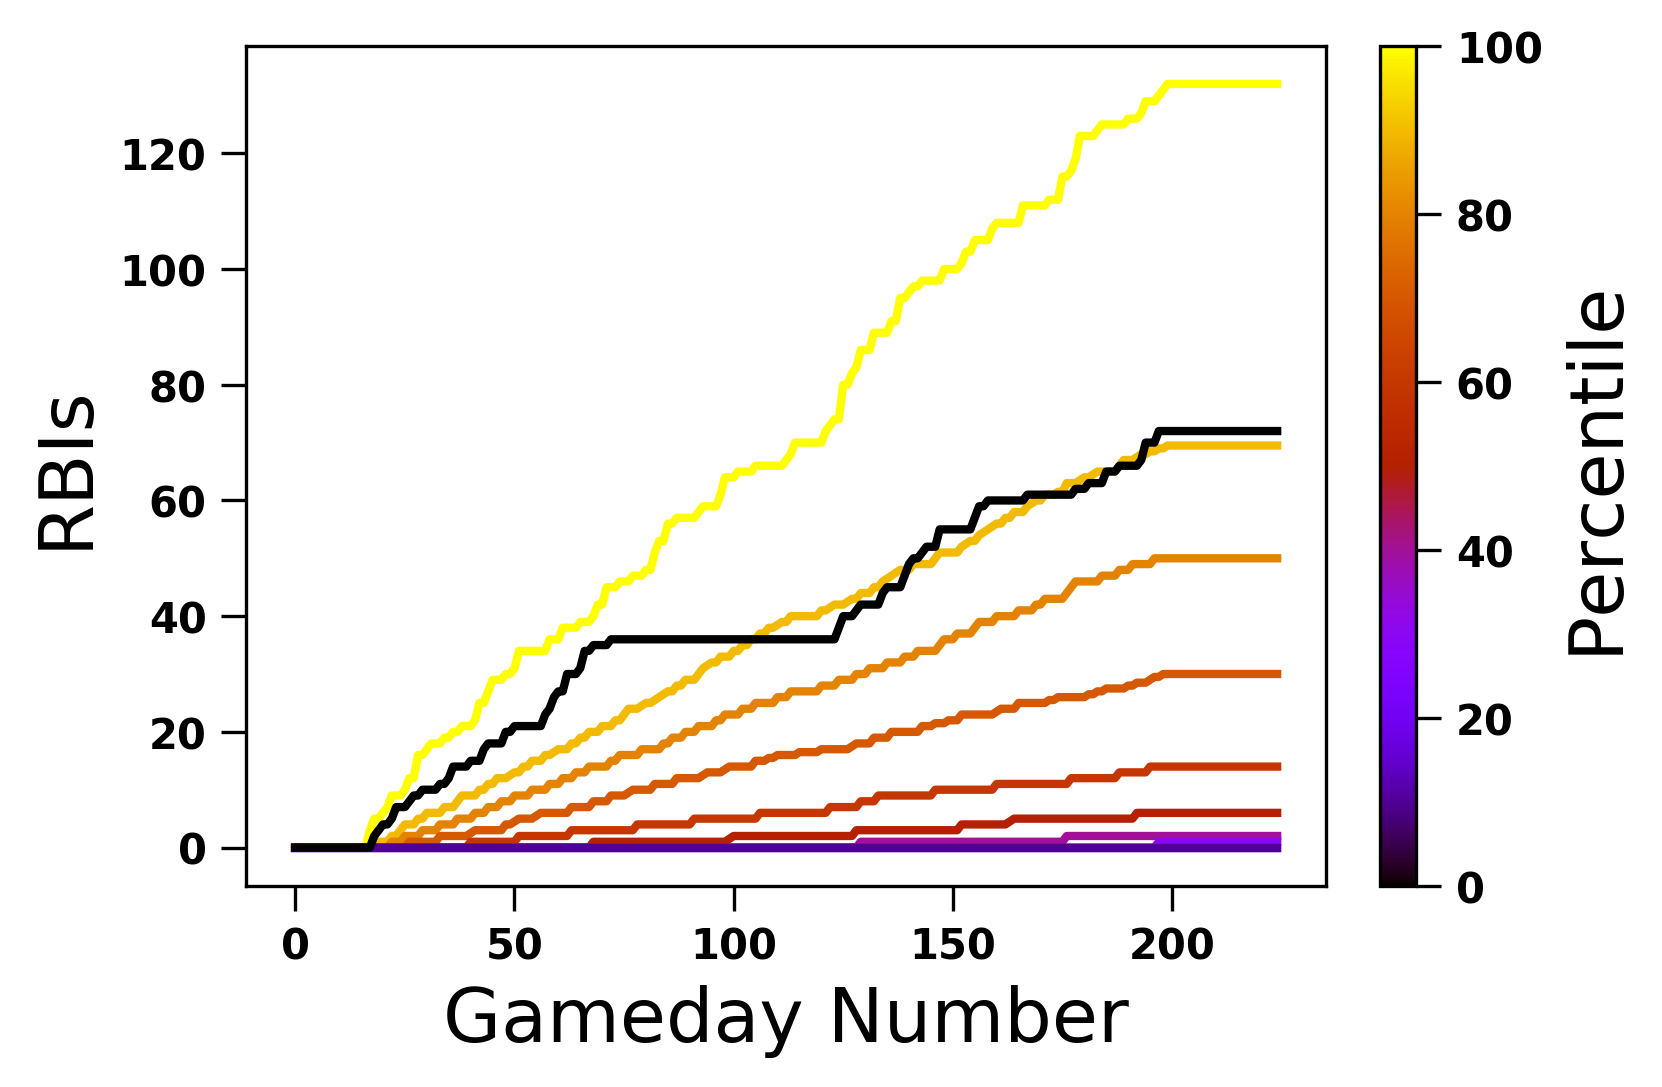

In [42]:
PAlist = np.zeros([len(np.array(DDStats['PA'].keys())),max_day-zero_day])


stat = 'RBI'
print(len(np.array(DDStats[stat].keys())) )

for indx,player in enumerate(DDStats[stat].keys()):
    PAlist[indx] = np.cumsum(DDStats[stat][player])


fig = plt.figure()
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,0,-10):
    ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

ax.plot(np.cumsum(DDStats[stat]['Mike Trout']),color='black')

    
ax.set_ylabel('RBIs',size=18)
ax.set_xlabel('Gameday Number',size=18)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)


